# GerberOLS

Diego Alvarez <br>
diego.alvarez@colorado.edu

# Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Accessing Gerber Object

In [2]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "src"))
from Gerber import Gerber

# Read in Data

In [19]:
df = pd.read_parquet(path = "df.parquet", engine = "pyarrow")
df_tmp = df[["ADP", "ADBE"]] * 100

# OLS Varaible estimation

In this case we'll be using the standard calculation to the variables, except we are going to use Gerber Covariance in lieu of Covariance, the calculation is analog to simple linear regression

In [20]:
exog = df_tmp.ADP #y
endog = df_tmp.ADBE #x

Statsmodels

In [21]:
ols_model = sm.OLS(endog = endog, exog = sm.add_constant(exog)).fit()
ols_alpha, ols_beta = ols_model.params
print(round(ols_alpha, 5), round(ols_beta, 5))

0.06981 0.68718


Gerber

In [22]:
gerber_alpha, gerber_beta = Gerber().gerberOLS(endog, exog)
print(round(gerber_alpha, 5), round(gerber_beta,5))

0.08555 0.39374


# Plotting

In [23]:
x = np.linspace(start = exog.min(), stop = exog.max(), num = 1_000)
y_ols = (x * ols_beta) + ols_alpha
y_gerber = (x * gerber_beta) + gerber_alpha

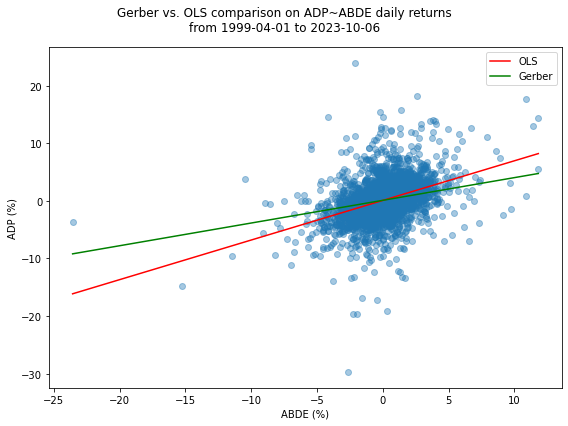

In [26]:
fig, axes = plt.subplots(figsize = (8,6))

axes.scatter(x = exog, y = endog, alpha = 0.4)
axes.plot(x, y_ols, color = "r", label = "OLS")
axes.plot(x, y_gerber, color = "g", label = "Gerber")

axes.set_xlabel("ABDE (%)")
axes.set_ylabel("ADP (%)")
axes.legend()

fig.suptitle("Gerber vs. OLS comparison on ADP~ABDE daily returns\nfrom {} to {}".format(
    endog.index.min().date(),
    endog.index.max().date()))

plt.tight_layout()
plt.show()